KNN 알고리즘을 사용하여 농구선수의 포지션(pos)을 예측해보세요
- pos: 플레이어의 포지션 ==> c: 센터*center) or SG: 슈팅가드(Shooting Guard)

In [1]:
# 데이터 불러오기
import pandas as pd
basketball = pd.read_csv('data/basketball.csv')
# 데이터 확인하기
basketball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [2]:
basketball.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [3]:
basketball.isnull().sum()

Player    0
Pos       0
3P        0
2P        0
TRB       0
AST       0
STL       0
BLK       0
dtype: int64

In [4]:
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [5]:
basketball.describe()

,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


In [6]:
def bar_chart(feature):
    SG = basketball[basketball['Pos']=='SG'][feature].value_counts()
    C = basketball[basketball['Pos']=='C'][feature].value_counts()
    df = pd.DataFrame([SG, C])
    df.index = ['SG', 'C']
    df.plot(kind='bar',stacked=True)

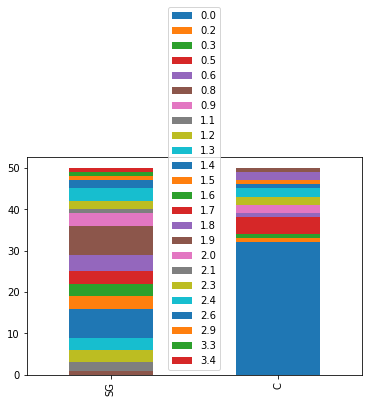

In [7]:
bar_chart('3P')

In [8]:
# 1.0 간격으로 점수 환산해 보기
def cal_score(col):
    cal_score = []
    for i in col:
        if i >= 14.0:
            x = 14.0
        elif i >= 13.0:
            x = 13.0
        elif i >= 12.0:
            x = 12.0
        elif i >= 11.0:
            x = 11.0
        elif i >= 10.0:
            x = 10.0
        elif i >= 9.0:
            x = 9.0
        elif i >= 8.0:
            x = 8.0
        elif i >= 7.0:
            x = 7.0
        elif i >= 6.0:
            x = 6.0
        elif i >= 5.0:
            x = 5.0
        elif i >= 4.0:
            x = 4.0
        elif i >= 3.0:
            x = 3.0
        elif i >= 2.0:
            x = 2.0
        elif i >= 1.0:
            x = 1.0    
        else:
            x = 0.0
        cal_score.append(x)
    return cal_score

In [9]:
basketball['3P'][0] > 1.5

False

In [10]:
len(basketball['3P'])

100

In [11]:
pd.DataFrame(basketball['3P']).apply(cal_score)

,3P
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
95,0.0
96,0.0
97,1.0
98,0.0


In [12]:
# 3P 열 값 변환
import numpy as np
basketball['3P_cal'] = pd.DataFrame(basketball['3P']).apply(cal_score)

In [13]:
basketball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK,3P_cal
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,1.0
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0,0.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6,0.0
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6,0.0
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5,1.0


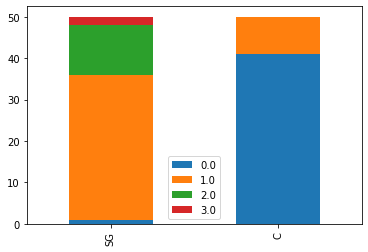

In [14]:
# SG와 C 사이의 관계 - SG가 유효한 3점 슛을 많음 추측 가능
bar_chart('3P_cal')

In [15]:
# 2P 열 값 변환
import numpy as np
basketball['2P_cal'] = pd.DataFrame(basketball['2P']).apply(cal_score)

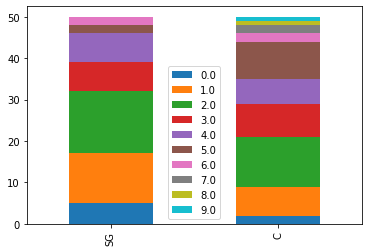

In [16]:
bar_chart('2P_cal')

In [17]:
# TRB, AST, STL, BLK 열 값 변환
import numpy as np
basketball['TRB_cal'] = pd.DataFrame(basketball['TRB']).apply(cal_score)
basketball['AST_cal'] = pd.DataFrame(basketball['AST']).apply(cal_score)
basketball['STL_cal'] = pd.DataFrame(basketball['STL']).apply(cal_score)
basketball['BLK_cal'] = pd.DataFrame(basketball['BLK']).apply(cal_score)

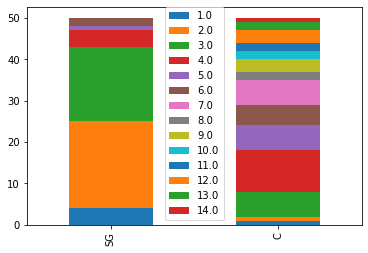

In [18]:
bar_chart('TRB_cal')

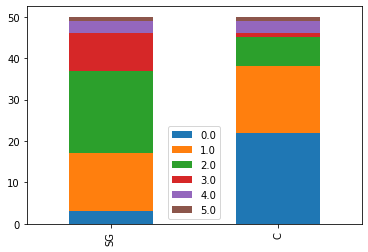

In [19]:
bar_chart('AST_cal')

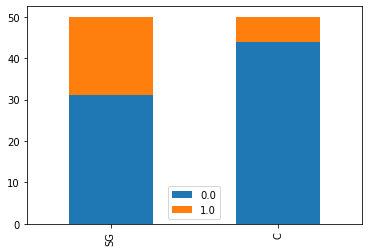

In [20]:
bar_chart('STL_cal')

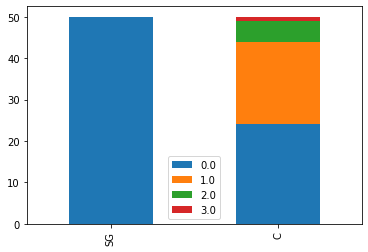

In [21]:
bar_chart('BLK_cal')

### SG와 C 사이의 관계 <br> - 3P, TRB, AST, STL, BLK의 상관관계를 파악해 볼 필요 있음

In [22]:
# Pos 열의 문자 데이터를 숫자로 변환
basketball['Pos_num'] = basketball['Pos']
basketball.loc[basketball['Pos_num'] == 'SG', 'Pos_num'] = 1
basketball.loc[basketball['Pos_num'] == 'C', 'Pos_num'] = 2

basketball['Pos_num'] = basketball['Pos_num'].astype('int')

In [23]:
basketball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK,3P_cal,2P_cal,TRB_cal,AST_cal,STL_cal,BLK_cal,Pos_num
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,1.0,0.0,1.0,0.0,0.0,0.0,1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0,0.0,4.0,7.0,1.0,1.0,1.0,2
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6,0.0,2.0,4.0,0.0,0.0,0.0,2
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6,0.0,0.0,2.0,0.0,0.0,0.0,2
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5,1.0,3.0,4.0,3.0,0.0,0.0,1


In [24]:
# 필요 없는 열 삭제
del basketball['3P_cal']
del basketball['2P_cal']
del basketball['TRB_cal']
del basketball['AST_cal']
del basketball['STL_cal']
del basketball['BLK_cal']

In [33]:
basketball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK,Pos_num
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0,2
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6,2
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6,2
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5,1


In [26]:
# 상관관계 측정 -> Pos_num과 상관도가 높은 BLK, 3P, TRB로 KNN 알고리즘 사용
basketball.corr(method='pearson')

,3P,2P,TRB,AST,STL,BLK,Pos_num
3P,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588,-0.787110
2P,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056,0.290651
TRB,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542,0.628595
AST,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161,-0.386874
STL,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208,-0.401425
BLK,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000,0.700786
Pos_num,-0.787110,0.290651,0.628595,-0.386874,-0.401425,0.700786,1.000000


C:\Users\ellie\anaconda3\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


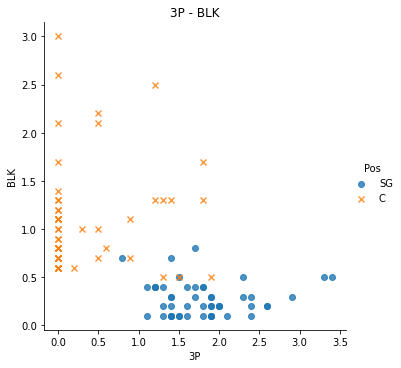

In [43]:
# 데이터 시각화(3P - BLK)
sns.lmplot('3P', 'BLK', data=basketball, fit_reg = False,
          markers = ['o', 'x'],
          hue='Pos')
plt.title('3P - BLK')
plt.show()

C:\Users\ellie\anaconda3\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


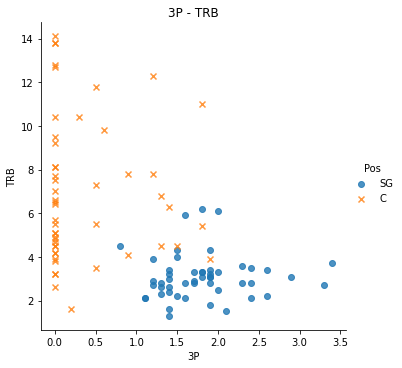

In [44]:
# 데이터 시각화(3P, TRB)
sns.lmplot('3P', 'TRB', data=basketball, fit_reg = False,
          markers = ['o', 'x'],
          hue='Pos')
plt.title('3P - TRB')
plt.show()

In [45]:
basketball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK,Pos_num
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0,2
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6,2
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6,2
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5,1


In [47]:
# 분별력 없는 데이터 삭제
del basketball['2P']
del basketball['AST']
del basketball['STL']
del basketball['Pos_num']

In [48]:
basketball.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [51]:
X = basketball[['3P', 'TRB', 'BLK']]
y = basketball['Pos']

In [53]:
# 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
print('X 훈련 데이터:', X_train.shape, 'X 테스트 데이터:', X_test.shape,
     '\ny 훈련 데이터:', y_train.shape, 'y 테스트 데이터:', y_test.shape)

X 훈련 데이터: (75, 3) X 테스트 데이터: (25, 3) 
y 훈련 데이터: (75,) y 테스트 데이터: (25,)


In [56]:
# knn 모델 학습
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [57]:
# 훈련세트를 사용한 분류 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
# 테스트 세트 정확도 - 얼마나 잘 일반화 되었는지 score 메서드 호출
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.84


In [64]:
# 테스트  데이터 예측 - predict 메서드 호출
print('테스트 세트 예측 :', clf.predict(X_test))
print('실제데이터 :', list(y_test))

테스트 세트 예측 : ['SG' 'SG' 'C' 'SG' 'C' 'C' 'C' 'C' 'SG' 'C' 'C' 'C' 'SG' 'C' 'SG' 'C'
 'SG' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'SG']
실제데이터 : ['SG', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'C', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C', 'C', 'C', 'C', 'SG']


In [32]:
# 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline

basketball.dataset.make_forge()


AttributeError: 'DataFrame' object has no attribute 'dataset'